In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [15]:
df = pd.read_pickle('final_arr_3.pkl')
df = df[(df['N'] > 3)].reset_index(drop=True)
df

,M,N,mean_initial_dist,mean_final_dist,mean_RI,std_RI
0,4,4,0.070658,0.038817,45.063264,0.045306
1,4,5,0.090491,0.070018,22.624701,0.032333
2,4,6,0.101101,0.080989,19.892557,0.023802
3,4,7,0.112793,0.095409,15.411849,0.019988
4,4,8,0.119087,0.103661,12.953156,0.019705
...,...,...,...,...,...,...
59,11,7,0.421029,0.344847,18.094124,0.026731
60,11,8,0.415663,0.357448,14.005442,0.022837
61,11,9,0.403505,0.350893,13.038772,0.018652
62,11,10,0.392570,0.349188,11.050817,0.015547


In [16]:
RI = np.array(df['mean_RI']).reshape([8,8])
ID = np.array(df['mean_initial_dist']).reshape([8,8])
FD = np.array(df['mean_final_dist']).reshape([8,8])

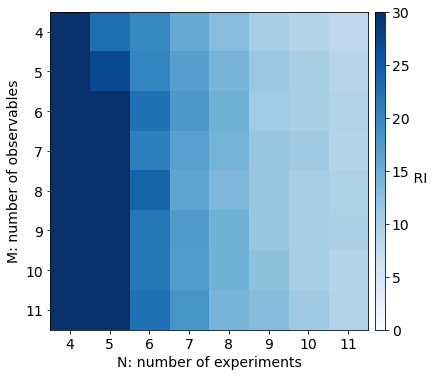

In [20]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
arr = RI[:,0:9]
im = ax.imshow(arr, cmap='Blues', vmin=0, vmax=30)
ax.set_xticks(np.arange(0,arr.shape[1]))
ax.set_yticks(np.arange(0,arr.shape[0]))
ax.set_xticklabels(4+np.arange(0,arr.shape[1]))
ax.set_yticklabels(4+np.arange(0,arr.shape[0]));
ax.set_xlabel('N: number of experiments')
ax.set_ylabel('M: number of observables');

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax)
cax.set_ylabel('   RI', rotation=0);

## Functions of M

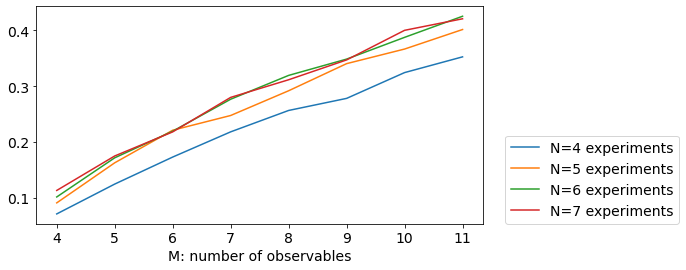

In [21]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(ID[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));

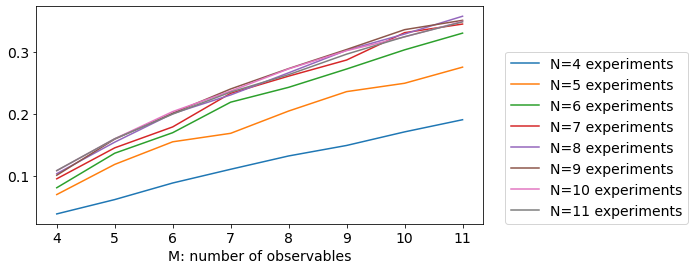

In [22]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(FD[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));

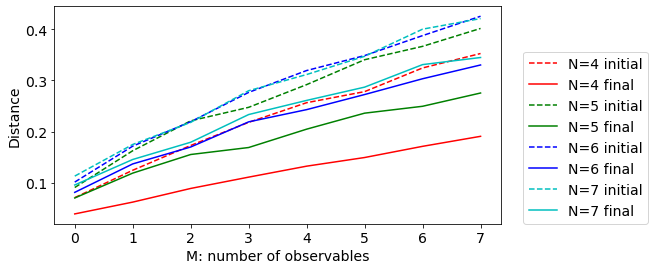

In [27]:
colors = ['r', 'g', 'b', 'c', 'm', 'y','gray','k']
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(ID[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+4))
    ax.plot(FD[:,i], ls='-', color=colors[i], label='N=%d final' %(i+4))
ax.legend(loc=[1.05,0]);
ax.set_ylabel('Distance')
ax.set_xlabel('M: number of observables');

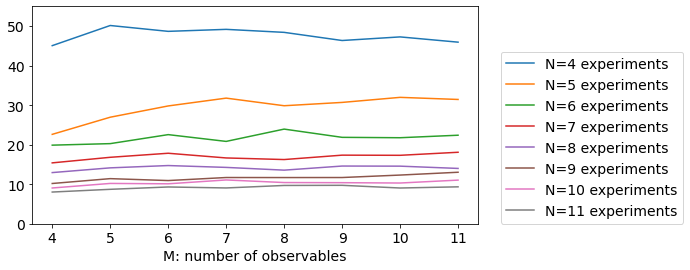

In [26]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(8):
    ax.plot(RI[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_ylim(0,55);
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(0,8));

## Different normalization

In [28]:
df

,M,N,mean_initial_dist,mean_final_dist,mean_RI,std_RI
0,4,4,0.070658,0.038817,45.063264,0.045306
1,4,5,0.090491,0.070018,22.624701,0.032333
2,4,6,0.101101,0.080989,19.892557,0.023802
3,4,7,0.112793,0.095409,15.411849,0.019988
4,4,8,0.119087,0.103661,12.953156,0.019705
...,...,...,...,...,...,...
59,11,7,0.421029,0.344847,18.094124,0.026731
60,11,8,0.415663,0.357448,14.005442,0.022837
61,11,9,0.403505,0.350893,13.038772,0.018652
62,11,10,0.392570,0.349188,11.050817,0.015547


In [29]:
IDN = np.array(df['mean_initial_dist'] / np.sqrt(df['M'])).reshape([8,8])
FDN = np.array(df['mean_final_dist'] / np.sqrt(df['M'])).reshape([8,8])

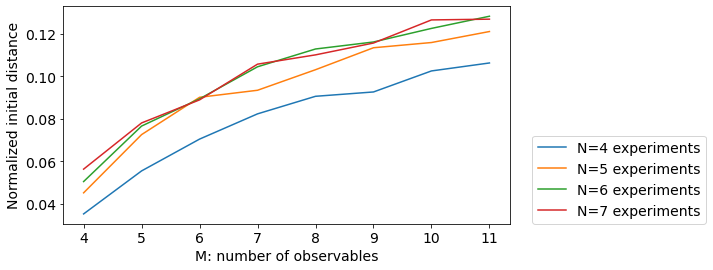

In [30]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

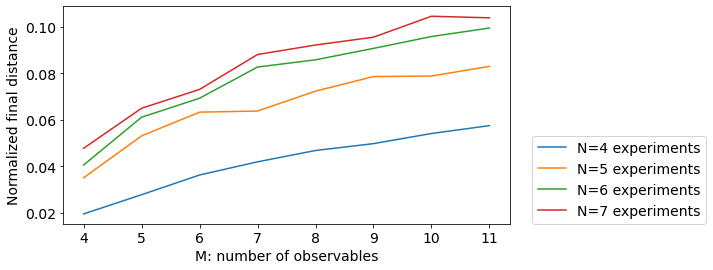

In [31]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[:,i], label='N=%d experiments' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized final distance');

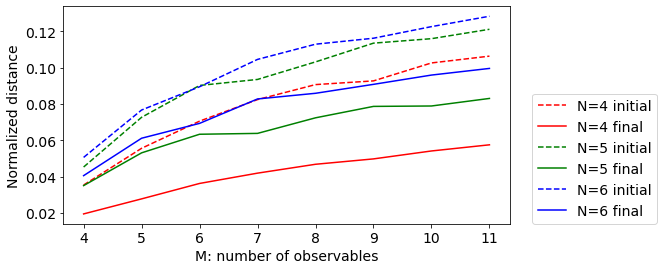

In [32]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[:,i], ls='--', color=colors[i], label='N=%d initial' %(i+4))
    ax.plot(FDN[:,i], ls='-', color=colors[i], label='N=%d final' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0.02,0.08);
ax.set_ylabel('Normalized distance');

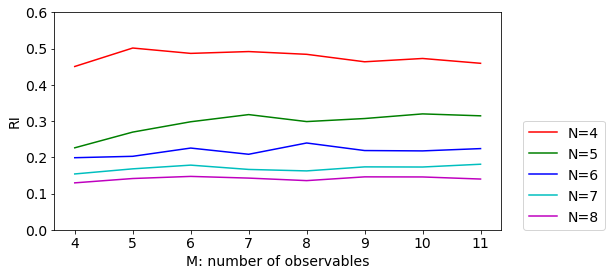

In [36]:
# Relative improvement is identical to the initial norm

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(5):
    ax.plot((IDN[:,i]-FDN[:,i])/IDN[:,i], ls='-', color=colors[i], label='N=%d' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('M: number of observables');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
ax.set_ylim(0.0,0.6);
ax.set_ylabel('RI');

## Functions of N

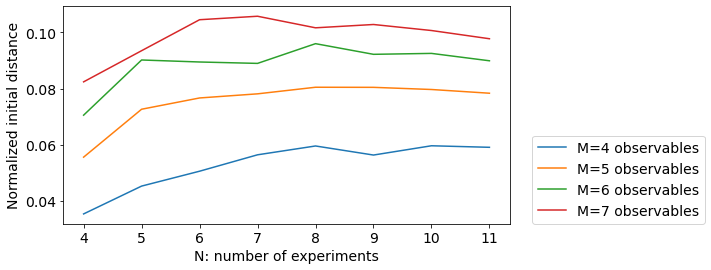

In [37]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(IDN[i], label='M=%d observables' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized initial distance');

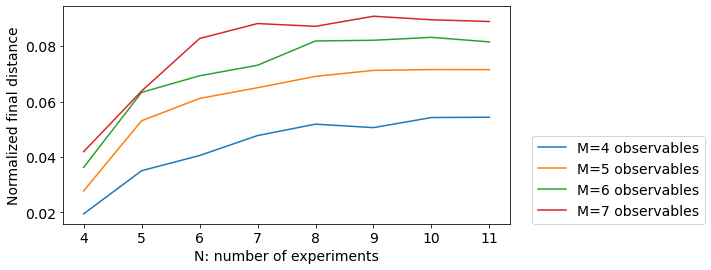

In [39]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(4):
    ax.plot(FDN[i], label='M=%d observables' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0,0.1);
ax.set_ylabel('Normalized final distance');

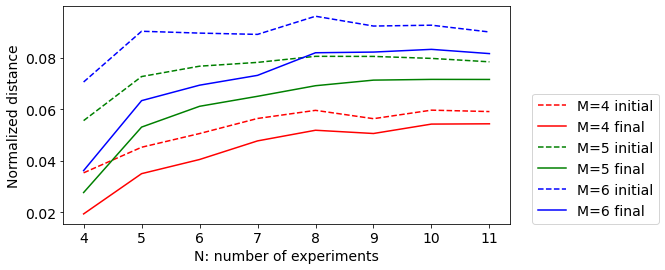

In [40]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(3):
    ax.plot(IDN[i], ls='--', color=colors[i], label='M=%d initial' %(i+4))
    ax.plot(FDN[i], ls='-', color=colors[i], label='M=%d final' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
#ax.set_ylim(0.02,0.08);
ax.set_ylabel('Normalized distance');

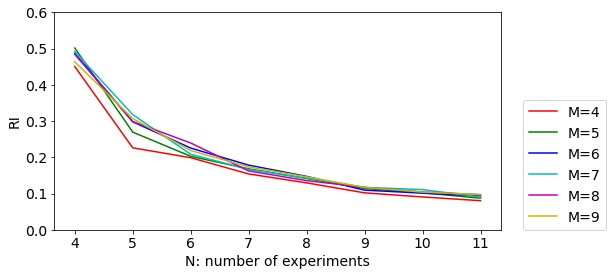

In [45]:
# Relative improvement

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(6):
    ax.plot((IDN[i]-FDN[i])/IDN[i], ls='-', color=colors[i], label='M=%d' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
ax.set_ylim(0.0,0.6);
ax.set_ylabel('RI');

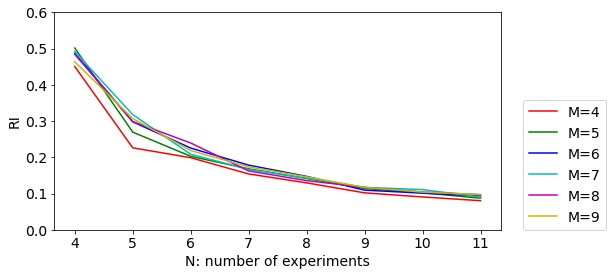

In [46]:
# The same with initial norm

fig, ax = plt.subplots(1,1,figsize=(8,4))
for i in range(6):
    ax.plot((ID[i]-FD[i])/ID[i], ls='-', color=colors[i], label='M=%d' %(i+4))
ax.legend(loc=[1.05,0])
ax.set_xlabel('N: number of experiments');
ax.set_xticks(range(8));
ax.set_xticklabels(4+np.arange(8));
ax.set_ylim(0.0,0.6);
ax.set_ylabel('RI');